Cheng Shi
USCID: 8556138235

1.Decision Trees as Interpretable Models
(a)Download the Accute Inflamations data fromhttps://archive.ics.uci.edu/ml/datasets/Acute+Inflammations.

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns = ["Temperature_of_patient", "Occurrence_of_nausea", "Lumbar_pain", "Urine_pushing", "Micturition_pains", "Problems_of_urethra", "Decision_Inflammation_of_urinary_bladder", "Decision_Nephritis_of_renal_pelvis_origin"]
df = pd.read_csv("../Homework5Data/data/diagnosis.data", encoding = "UTF-16", names = columns, header = None, sep = "\t", decimal = ",")
df

,Temperature_of_patient,Occurrence_of_nausea,Lumbar_pain,Urine_pushing,Micturition_pains,Problems_of_urethra,Decision_Inflammation_of_urinary_bladder,Decision_Nephritis_of_renal_pelvis_origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


(b)Build a decision tree on the whole data set and plot it. 1

[Text(0.4, 0.9, 'X[0] <= 37.95\nentropy = 0.99\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'X[3] <= 0.5\nentropy = 0.459\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\nentropy = 0.775\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'X[4] <= 0.5\nentropy = 0.479\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\nentropy = 0.465\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

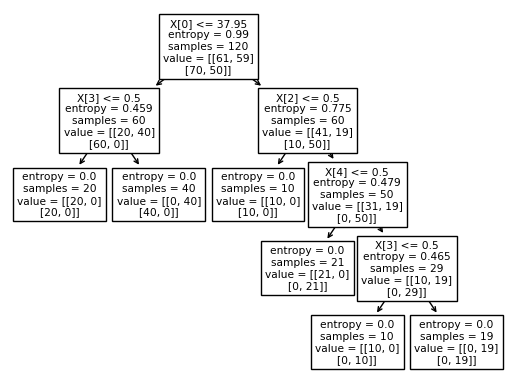

In [4]:
for col in df.columns:
    df.loc[ df[col] == 'yes', col] = 1
    df.loc[ df[col] == 'no', col] = 0

X = df[["Temperature_of_patient",'Occurrence_of_nausea','Lumbar_pain',"Urine_pushing", "Micturition_pains", "Problems_of_urethra"]]
Y = df[["Decision_Inflammation_of_urinary_bladder", "Decision_Nephritis_of_renal_pelvis_origin"]]
clf = tree.DecisionTreeClassifier(criterion = "entropy")
Y=Y.astype('int')
clf.fit(X, Y)
tree.plot_tree(clf)

(c)Convert the decision rules into a set of IF-THEN rules.2

In [5]:
def tree_to_code(tree, feature_names):

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)

In [6]:
tree_to_code(clf, df.columns)

def tree(Temperature_of_patient, Occurrence_of_nausea, Lumbar_pain, Urine_pushing, Micturition_pains, Problems_of_urethra, Decision_Inflammation_of_urinary_bladder, Decision_Nephritis_of_renal_pelvis_origin):
  if Temperature_of_patient <= 37.95000076293945:
    if Urine_pushing <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine_pushing > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature_of_patient > 37.95000076293945
    if Lumbar_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar_pain > 0.5
      if Micturition_pains <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Micturition_pains > 0.5
        if Urine_pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine_pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


(d)Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.


Ans: from the graph below, we can see that the best result shows when alpha close to 0. Besides the original decision tree, I also used 6-fold cross validation and plotted the 2nd graph.

array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611])

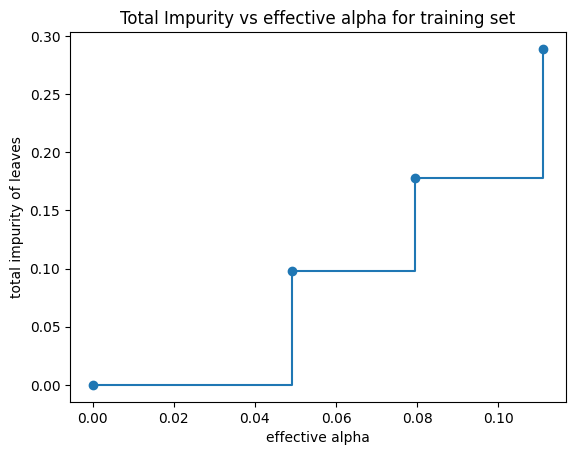

In [7]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X, Y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#In the following plot, the maximum effective alpha value is removed
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker = "o", drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
ccp_alphas

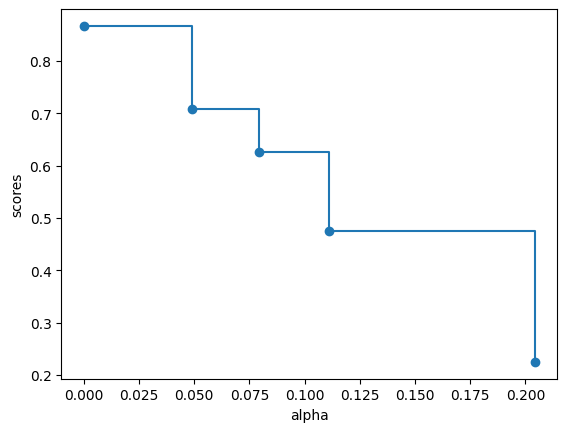

In [8]:
scores = []
cv = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    #6-fold cross validation
    score = cross_val_score(estimator = clf, X = X, y = Y, cv = 6)
    scores.append(score)
    cv.append(score.mean())
    
fig, ax = plt.subplots()
ax.plot(ccp_alphas, cv, marker = "o", drawstyle = "steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("scores")

plt.show()

2.The LASSO and Boosting for Regression
#https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

In [9]:
#(a) train & test dataset

import os
cols = []
file = open("../Homework5Data/data/communities.names")
for line in file:
    if '@attribute' in line:
        cols.append(line[11:-8])

df2 = pd.read_csv("../Homework5Data/data/communities.data",names = cols, na_values=["?"])

df_train = df2[:1495]
df_test = df2[1495:]
df_train


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,NaN,NaN,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,6,NaN,NaN,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,13,NaN,NaN,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,39,85.0,49056.0,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


(b)The data set has missing values. Use a data imputation technique to deal withthe missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [10]:
from sklearn.impute import SimpleImputer
df_2 = df2.iloc[:,5:]
imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean')

imp_mean.fit(df_2)
imputed_df = imp_mean.transform(df_2)

train = imputed_df[:1495]
test = imputed_df[1495:]
df_2 = pd.DataFrame(imputed_df, columns=cols[5:])
train = pd.DataFrame(train,columns=cols[5:])
test = pd.DataFrame(test,columns=cols[5:])
df_2

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


(c)Plot a correlation matrix for the features in the data set.

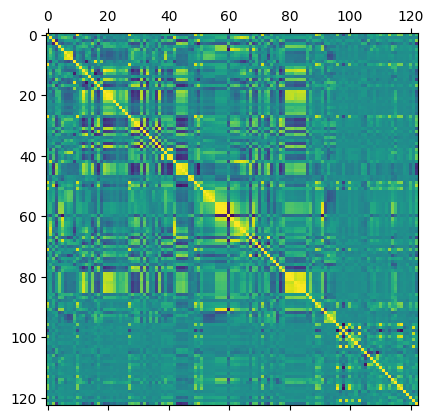

In [11]:
plt.matshow(df_2.corr())
plt.show()

(d)Calculate the Coefficient of Variation CV for each feature, where CV=s/m, in which s is sample standard deviation and mis sample mean.


In [12]:
cv = df_2.std() / df_2.mean()
cv

population              2.203503
householdsize           0.353298
racepctblack            1.410920
racePctWhite            0.323782
racePctAsian            1.359162
                          ...   
LemasPctPolicOnPatr     0.122331
LemasGangUnitDeploy     0.368040
LemasPctOfficDrugUn     2.555266
PolicBudgPerPop         0.337281
ViolentCrimesPerPop     0.979015
Length: 123, dtype: float64

(e)Pick √128 features with highest CV, and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

Ans: The CV is useful for comparing the degree of variation from one data series to another, even if the means are drastically different from one another. Therefore, the CV didn't provide sufficient information about the significance, so we cannot simply draw a conclusion about significance by the scatter plot,

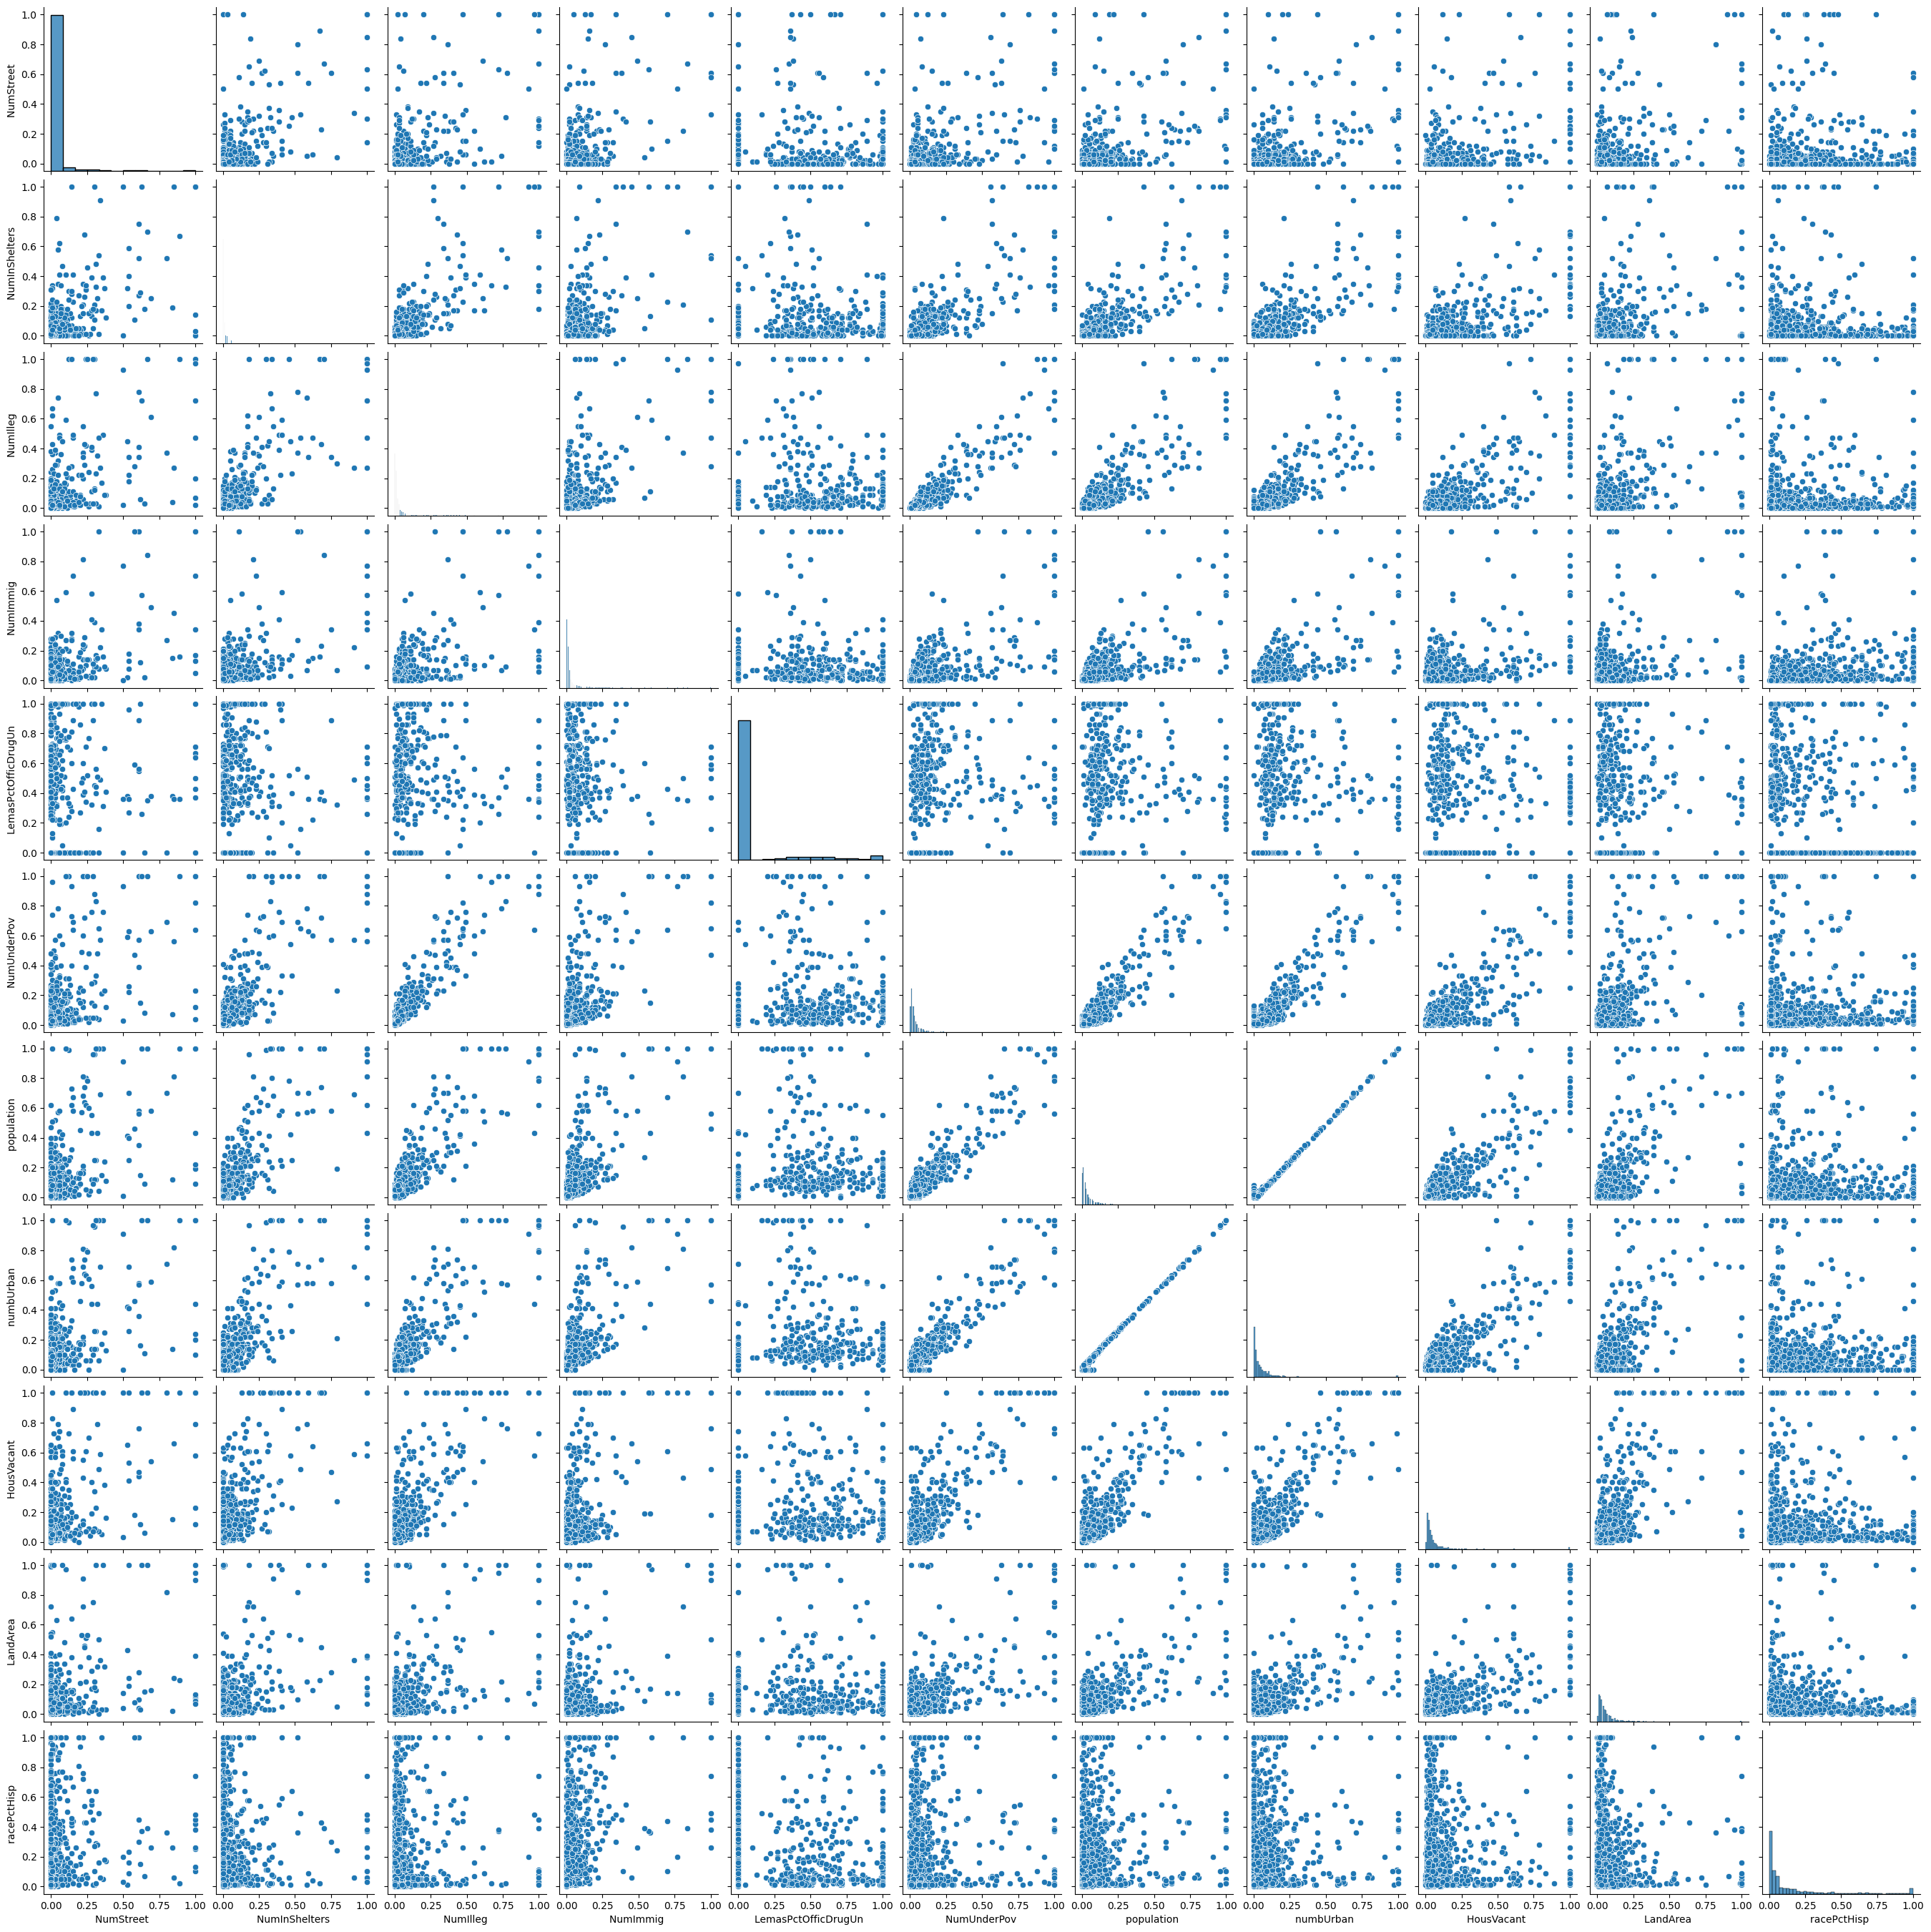

In [13]:
pick = np.sqrt(128)
pick = np.floor(pick)
cv_pick = cv.sort_values(ascending=False) [:int(pick)]
df_pick = pd.DataFrame(df_2, columns = cv_pick.keys())

sns.pairplot(data = df_pick, kind = "scatter")

<AxesSubplot:>

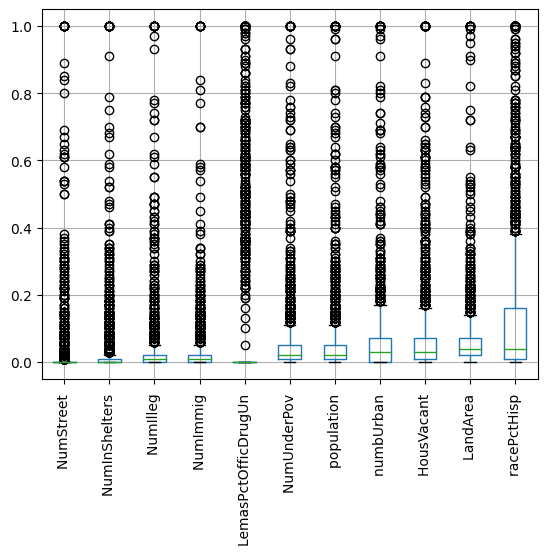

In [14]:
boxplot = df_pick.boxplot(rot=90, fontsize=10 )

boxplot

(f)Fit a linear model using least squares to the training set and report the test error.

In [15]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
from sklearn.linear_model import LinearRegression

y = train.iloc[:, -1]
train_x = train.iloc[:,:-1]
test_y = test.iloc[:, -1]
test_x = test.iloc[:,:-1]

linear_model = LinearRegression().fit(train_x, y)
score = MSE(test_y,linear_model.predict(test_x))

print("MSE", score)

MSE 0.7897255274220832


(g)Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [17]:
r_model = RidgeCV(cv = 5).fit(train_x, y)
lamd = r_model.alpha_
score = MSE(test_y,r_model.predict(test_x))

print("MSE", score, 'lambda:',lamd)

MSE 0.017737081104303696 lambda: 1.0


(h)Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

Model without data standarized has 75 variables and MSE 0.017763 best lambda 0.00012; Model with standarized has 73 variable and MSE 0.017962 best lambda 0.00082; Thus, the model without data standarized perform better than the standarized one.


In [18]:
l_model = LassoCV(cv = 5,random_state = 0, tol = 1e-3).fit(train_x, y)
lamd_l1 = l_model.alpha_
score1 = MSE(test_y,l_model.predict(test_x))

var = []
for i in range(len(l_model.coef_)):
    if l_model.coef_[i] != 0:
        var.append(train_x.columns[i])
print(len(var), "variables:", var)
print("MSE", score1, 'lambda:',lamd_l1)

75 variables: ['racepctblack ', 'racePctAsian ', 'agePct12t21 ', 'agePct12t29 ', 'pctUrban ', 'pctWWage ', 'pctWFarmSelf ', 'pctWInvInc ', 'pctWSocSec ', 'pctWPubAsst ', 'pctWRetire ', 'whitePerCap ', 'blackPerCap ', 'indianPerCap ', 'AsianPerCap ', 'OtherPerCap ', 'HispPerCap ', 'PctPopUnderPov ', 'PctLess9thGrade ', 'PctEmploy ', 'PctEmplManu ', 'PctOccupManu ', 'MalePctDivorce ', 'MalePctNevMarr ', 'FemalePctDiv ', 'PctKids2Par ', 'PctYoungKids2Par ', 'PctTeen2Par ', 'PctWorkMom ', 'NumIlleg ', 'PctIlleg ', 'NumImmig ', 'PctImmigRecent ', 'PctImmigRec10 ', 'PctRecImmig10 ', 'PctNotSpeakEnglWell ', 'PctLargHouseOccup ', 'PersPerOccupHous ', 'PctPersOwnOccup ', 'PctPersDenseHous ', 'PctHousLess3BR ', 'MedNumBR ', 'HousVacant ', 'PctHousOccup ', 'PctVacantBoarded ', 'PctVacMore6Mos ', 'MedYrHousBuilt ', 'PctHousNoPhone ', 'PctWOFullPlumb ', 'OwnOccLowQuart ', 'RentLowQ ', 'MedRent ', 'MedRentPctHousInc ', 'MedOwnCostPctInc ', 'MedOwnCostPctIncNoMtg ', 'NumInShelters ', 'NumStreet ', 'P

In [19]:
train_std = StandardScaler().fit_transform(train_x)
test_std= StandardScaler().fit_transform(test_x)

l_std_model = LassoCV(cv = 5,random_state = 0, tol = 1e-3).fit(train_std, y)
lamd_l2 = l_std_model.alpha_

score2 = MSE(test_y,l_std_model.predict(test_std))

var = []
for i in range(len(l_std_model.coef_)):
    if l_std_model.coef_[i] != 0:
        var.append(train_x.columns[i])
print(len(var), "variables:", var)
print("MSE", score2, 'lambda:',lamd_l2)

73 variables: ['racepctblack ', 'racePctAsian ', 'agePct12t21 ', 'agePct12t29 ', 'pctUrban ', 'pctWWage ', 'pctWFarmSelf ', 'pctWInvInc ', 'pctWSocSec ', 'pctWPubAsst ', 'pctWRetire ', 'whitePerCap ', 'blackPerCap ', 'indianPerCap ', 'AsianPerCap ', 'OtherPerCap ', 'HispPerCap ', 'PctPopUnderPov ', 'PctLess9thGrade ', 'PctEmploy ', 'PctEmplManu ', 'MalePctDivorce ', 'MalePctNevMarr ', 'FemalePctDiv ', 'PctKids2Par ', 'PctYoungKids2Par ', 'PctTeen2Par ', 'PctWorkMom ', 'NumIlleg ', 'PctIlleg ', 'NumImmig ', 'PctImmigRec5 ', 'PctImmigRec10 ', 'PctRecImmig10 ', 'PctNotSpeakEnglWell ', 'PctLargHouseOccup ', 'PersPerOccupHous ', 'PctPersOwnOccup ', 'PctPersDenseHous ', 'PctHousLess3BR ', 'HousVacant ', 'PctHousOccup ', 'PctVacantBoarded ', 'PctVacMore6Mos ', 'MedYrHousBuilt ', 'PctHousNoPhone ', 'PctWOFullPlumb ', 'RentLowQ ', 'MedRent ', 'MedRentPctHousInc ', 'MedOwnCostPctInc ', 'MedOwnCostPctIncNoMtg ', 'NumInShelters ', 'NumStreet ', 'PctForeignBorn ', 'PctSameCity85 ', 'LemasSwFTFieldP

(i)Fit a PCR model on the training set, with M(the number of principal components) chosen by cross-validation. Report the test error obtained

In [20]:
cv_l = []

for i in range(1,len(train_x.columns)+1):
    pca = PCA(n_components=i)
    cv = -cross_val_score(estimator = LinearRegression(), scoring = "neg_mean_squared_error", X = pca.fit_transform(train_x), y = y, cv = 5)
    cv_l.append(cv.mean())

min_cv = min(cv_l),
m = np.where(cv_l == min(cv_l))
print('cv:',  min_cv, 'm:',m)
    

cv: (0.019413504376972354,) m: (array([95]),)


(j)In this section, we would like to fit a boosting tree to the data. As in classificationtrees, one can use any type of regression at each node to build a multivariateregression tree. Because the number of variables is large in this problem, onecan useL1-penalized regression at each node. Such a tree is called L1penalizedgradient boosting tree. You can use XGBoost5to fit the model tree. Determine α(the regularization term) using cross-validation

ANS: best alpha will be 12 with lowest error 0.2094

In [34]:
import xgboost as xgb
d_train = xgb.DMatrix(data = train_x, label = y)
d_test = xgb.DMatrix(data = test_x, label = test_y)
alphas = [0.001,0.01, 0.1, 0.5, 1, 5, 10, 11, 12,13, 14,15]
errs = []
res = []
for i in alphas:
    xgb_cv = xgb.cv(dtrain=d_train, params={'alpha':i}, nfold=5, metrics = 'error') 
    errs.append(xgb_cv['test-error-mean'].mean())
for i in range(0,len(alphas)):
    res.append([alphas[i],errs[i]])
    
print(res)
print('best alpha will be 12 with lowest error 0.2094')

[[0.001, 0.21376588641513253], [0.01, 0.21151705685616737], [0.1, 0.21324682281517662], [0.5, 0.21123478239582835], [1, 0.21175652171083317], [5, 0.21123344471148622], [10, 0.20990769197086623], [11, 0.2102943140978498], [12, 0.20948361173396726], [13, 0.21098327743543632], [14, 0.21023277566609372], [15, 0.21149565183274124]]
best alpha will be 0.05 with lowest error 0.210826
